# Eindopdracht Traineeship RSG

## Data impact met Python
### Door: Mirjam Leseman

### Introductie
Op dit moment analyseert Synthon vooral veel financiële data. Het doel is om dit de komende tijd steeds verder uit te breiden met non-financiële data, startende met HR data. Met HR data wordt data bedoeld die gekoppeld is aan FTE’s (FTE = Full Time Equivalent). Synthon is bezig met het uitbreiden van het pakket binnen het software applicatie landschap van IBM.

Door het analyseren van HR data zullen er nieuwe inzichten binnen Synthon komen. Voor de huidige situatie kunnen er cijfers in kaart worden gebracht, zoals de man/vrouw verhouding en salarissen binnen afdelingen. In de toekomst kunnen er patronen onderzocht worden in onder andere ziekteverzuim en de samenstelling binnen afdelingen. In eerste instantie zal de focus liggen op HR data van Synthon Nederland, later voor Synthon wereldwijd. Synthon kan met deze inzichten een duidelijk beeld krijgen van de werkomgeving en rekening houden met het plannen van projecten en processen en een betere capaciteitsinschatting maken.

### Business vraag
Welke conclusies kunnen er getrokken worden uit de beschikbare HR data?

### Stakeholders
Intern: C-level management, HR. \
• Voor verzuimdata: Ook werknemers die met plannen van mensen voor projecten bezig zijn, ook Synthon als bedrijf in verband met omzet.

### Data
HR-data, bestaande uit:\
• Werknemer\
• Contractvorm\
• Leeftijd\
• Salaris\
• Afdeling\
• Geslacht\
• Nationaliteit\
• Deeltijdsfactor\
• Functie\
• Verzuim (Verzuimdata is nog niet beschikbaar, zal in toekomst onderzocht worden)\
Notitie: De data is confidentieel en kan niet gedeeld worden met derden.

### Doel
#### Hoofddoel:
Het inzichtelijk maken van de HR dataset van Synthon door middel van Dashboards die C-level management / HR kunnen ondersteunen in het maken van keuzes.

#### Subdoelen:
Data preparen en valideren in Python.\
Dashboard bouwen in IBM Cognos Analytics.\
(Lange termijn: Connectie bouwen automatische import data Visma (HR-syteem) en IBM Cognos Analytics)

## De Opdracht

Deze opdracht bestaat uit twee delen.\
Deel 1: Python Notebook\
Deel 2: Dashboard in IBM Cognos Planning Analytics

• Notitie: Vraag is of ik verzuim data op tijd ga krijgen. Onderzoek gaat op dit moment alleen over Synthon Nederland.\
  -> 18 mei nog steeds geen verzuimdata\
  -> Focus gaat liggen op HR-data inzichtelijk maken wat betreft man/vrouw verhouding en salarisverdeling\
• Huidig idee: Kijk per afdeling

### Loading Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as math

### Import Data

In [2]:
HR_Data_Bron = pd.read_excel('data/HR_Data_(bron).xlsx')

In [3]:
HR_Data_Bron = HR_Data_Bron.drop(['BSN','Achternaam'],axis=1) #delete kolommen die naar persoon wijzen ivm privacy

In [4]:
HR_Data_Bron

,Datum in dienst,Datum uit dienst,Geslacht,Nationaliteit,Geboorteplaats,Werknemernummer,Geboortedatum,Leeftijd,Arbeidscontract,Cats. Salarisschaal,Deeltijdfactor,Salaris (100%),RSP-factor,Afdeling,Functiefamilie,Functie
0,1994-06-01,NaT,V,Nederlandse,NaN,3,1967-08-05,52,Onbepaalde duur,15.0,0.75,5164.0,99.77,Corporate Quality Compliance,Officer,Officer-C
1,1994-11-01,NaT,M,Nederlandse,EINDHOVEN,6,1964-05-07,55,Onbepaalde duur,18.0,1.00,8973.0,111.16,Site Services Synthon NL & GSP,Project Leader,Project Leader-D
2,1995-01-01,NaT,V,Nederlandse,NaN,7,1968-05-24,51,Onbepaalde duur,17.0,1.00,7048.0,101.94,API Procurement,Project Leader,Project Leader-C
3,1995-02-01,NaT,M,Nederlandse,NaN,10,1968-03-10,52,Onbepaalde duur,15.0,1.00,5745.0,110.99,Corporate Application Services,Officer,Officer-C
4,1995-09-01,NaT,M,Nederlandse,Arnhem,16,1971-04-06,49,Onbepaalde duur,16.0,1.00,6579.0,111.26,Corporate Application Services,Project Leader,Project Leader-B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2019-11-01,NaT,M,Nederlandse,NaN,1350,1959-08-14,60,Onbepaalde duur,20.0,1.00,30212.0,90.00,Stamina BidCo BV,Chief x Officer,Board
188,2020-02-10,2020-06-28,V,Nederlandse,NaN,1351,1997-06-02,22,Stagiair(e),NaN,1.00,400.0,NaN,Human Resources,NaN,Intern
189,2020-03-01,2021-02-28,M,Nederlandse,Amsterdam,1352,1973-02-01,47,Tijdelijk contract,15.0,1.00,5598.0,108.15,Drug Master File,Project Leader,Project Leader-A
190,2019-11-25,2020-11-25,V,Nederlandse,NaN,1353,1982-03-26,38,Uitzendcontract,NaN,1.00,0.0,NaN,API Procurement,NaN,Assistant-B


Het zou interessant zijn om verhoudingen op afdelingen te vergelijken, maar ook om hoofdafdelingen te vergelijken. Dit is een groep afdelingen die een bepaalde categorie representeren. Zo hebben we minder groepen en meer datapunten per groep.\
Volgende dataset beschikbaar:

In [5]:
Data_Hoofdafdeling = pd.read_excel('data/Data_Hoofdafdeling.xlsx')
Data_Hoofdafdeling

,Mapping,Cost center
0,G&A,1504050
1,G&A,3204010
2,G&A,3204020
3,G&A,3204030
4,G&A,3204040
5,G&A,3204041
6,G&A,3204060
7,M&S,3203010
8,M&S,3203011
9,M&S,3203020


Afkortingen Hoofdafdelingen:\
G&A : General & Administrative\
M&S : Marketing & Sales\
R&D : Research & Development\
PRD : Production\
Shared Services

Om de bron data 'HR_Data_Bron' te joinen met de hoofdafdelingen in bovenstaande tabel. Zullen we eerst 'HR_Data_Bron' moeten joinen met een dataset zodat we de cost centers krijgen.\
Volgende data set is beschikbaar:

In [6]:
Data_Cost_Center = pd.read_excel('data/Data_Cost_Center.xlsx')
Data_Cost_Center

,Cost center,Afdeling
0,3203040,Account Management
1,3201021,Analytical Operation
2,3201050,API Procurement
3,3203080,Business Development
4,3202150,Clinical Research & Development
5,3205010,Corporate Application Services
6,3205010,Corporate Application Services 2
7,3204010,Corporate Communications
8,3204041,Corporate Controlling & Accounting
9,3205010,Corporate Infrastructure Services


Deze dataset weergeeft de cost center per afdeling. Deze kunnen we mergen/joinen met de bron data 'HR_Data_Bron'.

In [7]:
HR_Data = pd.merge(HR_Data_Bron, Data_Cost_Center, how='left', on='Afdeling')
HR_Data

,Datum in dienst,Datum uit dienst,Geslacht,Nationaliteit,Geboorteplaats,Werknemernummer,Geboortedatum,Leeftijd,Arbeidscontract,Cats. Salarisschaal,Deeltijdfactor,Salaris (100%),RSP-factor,Afdeling,Functiefamilie,Functie,Cost center
0,1994-06-01,NaT,V,Nederlandse,NaN,3,1967-08-05,52,Onbepaalde duur,15.0,0.75,5164.0,99.77,Corporate Quality Compliance,Officer,Officer-C,3203020.0
1,1994-11-01,NaT,M,Nederlandse,EINDHOVEN,6,1964-05-07,55,Onbepaalde duur,18.0,1.00,8973.0,111.16,Site Services Synthon NL & GSP,Project Leader,Project Leader-D,3204060.0
2,1995-01-01,NaT,V,Nederlandse,NaN,7,1968-05-24,51,Onbepaalde duur,17.0,1.00,7048.0,101.94,API Procurement,Project Leader,Project Leader-C,3201050.0
3,1995-02-01,NaT,M,Nederlandse,NaN,10,1968-03-10,52,Onbepaalde duur,15.0,1.00,5745.0,110.99,Corporate Application Services,Officer,Officer-C,3205010.0
4,1995-09-01,NaT,M,Nederlandse,Arnhem,16,1971-04-06,49,Onbepaalde duur,16.0,1.00,6579.0,111.26,Corporate Application Services,Project Leader,Project Leader-B,3205010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2019-11-01,NaT,M,Nederlandse,NaN,1350,1959-08-14,60,Onbepaalde duur,20.0,1.00,30212.0,90.00,Stamina BidCo BV,Chief x Officer,Board,NaN
196,2020-02-10,2020-06-28,V,Nederlandse,NaN,1351,1997-06-02,22,Stagiair(e),NaN,1.00,400.0,NaN,Human Resources,NaN,Intern,3204030.0
197,2020-03-01,2021-02-28,M,Nederlandse,Amsterdam,1352,1973-02-01,47,Tijdelijk contract,15.0,1.00,5598.0,108.15,Drug Master File,Project Leader,Project Leader-A,3203011.0
198,2019-11-25,2020-11-25,V,Nederlandse,NaN,1353,1982-03-26,38,Uitzendcontract,NaN,1.00,0.0,NaN,API Procurement,NaN,Assistant-B,3201050.0


We hebben nu 200 rows. Is de lengte gestegen?

In [8]:
len(HR_Data)-len(HR_Data_Bron)

8

De lengte van de HR_Data is gestegen in vergelijking met de bron data. Hoe kan dit?\
Aan de afdelingen Quality & Drug Safety en Information Services zijn 2 Cost centers gekoppeld, omdat de Vice Presidents (VP's) in deze afdelingen een ander Cost center hebben.\
Dit betekent dat voor elk werknemernummer twee rijen aanwezig zijn: 1 met Cost center van de afdeling en 1 met Cost center van de VP op de desbetreffende afdeling.\

We deleten nu van de werknemers in de afdelingen Quality & Drug Safety en Information Services de rijen met de Cost centers van de VP's in 'HR_Data' en passen de data voor de corresponderende VP's aan.\
Zie onderstaand voorbeeld van dubbele rijen met verschillende cost centers.

In [9]:
HR_Data[HR_Data.Afdeling == 'Information Services']

,Datum in dienst,Datum uit dienst,Geslacht,Nationaliteit,Geboorteplaats,Werknemernummer,Geboortedatum,Leeftijd,Arbeidscontract,Cats. Salarisschaal,Deeltijdfactor,Salaris (100%),RSP-factor,Afdeling,Functiefamilie,Functie,Cost center
22,1999-12-01,NaT,V,Nederlandse,NaN,79,1969-10-22,50,Onbepaalde duur,12.0,0.7,4040.0,109.16,Information Services,NaN,Assistant-B,3205010.0
23,1999-12-01,NaT,V,Nederlandse,NaN,79,1969-10-22,50,Onbepaalde duur,12.0,0.7,4040.0,109.16,Information Services,NaN,Assistant-B,3205011.0
124,2015-09-01,NaT,M,Nederlandse,Harderwijk,945,1972-07-21,47,Onbepaalde duur,15.0,0.8,5387.0,104.08,Information Services,Officer,Officer-C,3205010.0
125,2015-09-01,NaT,M,Nederlandse,Harderwijk,945,1972-07-21,47,Onbepaalde duur,15.0,0.8,5387.0,104.08,Information Services,Officer,Officer-C,3205011.0
126,2015-09-01,NaT,M,Nederlandse,Venlo,946,1961-08-13,58,Onbepaalde duur,15.0,1.0,5587.0,107.94,Information Services,Officer,Officer-C,3205010.0
127,2015-09-01,NaT,M,Nederlandse,Venlo,946,1961-08-13,58,Onbepaalde duur,15.0,1.0,5587.0,107.94,Information Services,Officer,Officer-C,3205011.0
180,2001-09-01,NaT,M,Nederlandse,NaN,1309,1967-03-02,53,Onbepaalde duur,20.0,1.0,18356.0,90.00,Information Services,Vice President,Vice President,3205010.0
181,2001-09-01,NaT,M,Nederlandse,NaN,1309,1967-03-02,53,Onbepaalde duur,20.0,1.0,18356.0,90.00,Information Services,Vice President,Vice President,3205011.0


We beginnen met Information Services. We verwijderen de rijen met Cost center van VP Information Services (3205011).\

In [10]:
HR_Data = HR_Data[HR_Data['Cost center'] != 3205011]


Nu heeft de VP van Information Services de verkeerde cost center, namelijk die van de afdeling van Information Services. Deze dienen we nog handmatig te veranderen.

In [11]:
HR_Data.loc[(HR_Data.Afdeling == 'Information Services') & (HR_Data.Functie == 'Vice President'),'Cost center'] = 3205011
HR_Data[HR_Data.Afdeling == 'Information Services']

C:\Users\MirjamLeseman\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Datum in dienst,Datum uit dienst,Geslacht,Nationaliteit,Geboorteplaats,Werknemernummer,Geboortedatum,Leeftijd,Arbeidscontract,Cats. Salarisschaal,Deeltijdfactor,Salaris (100%),RSP-factor,Afdeling,Functiefamilie,Functie,Cost center
22,1999-12-01,NaT,V,Nederlandse,NaN,79,1969-10-22,50,Onbepaalde duur,12.0,0.7,4040.0,109.16,Information Services,NaN,Assistant-B,3205010.0
124,2015-09-01,NaT,M,Nederlandse,Harderwijk,945,1972-07-21,47,Onbepaalde duur,15.0,0.8,5387.0,104.08,Information Services,Officer,Officer-C,3205010.0
126,2015-09-01,NaT,M,Nederlandse,Venlo,946,1961-08-13,58,Onbepaalde duur,15.0,1.0,5587.0,107.94,Information Services,Officer,Officer-C,3205010.0
180,2001-09-01,NaT,M,Nederlandse,NaN,1309,1967-03-02,53,Onbepaalde duur,20.0,1.0,18356.0,90.00,Information Services,Vice President,Vice President,3205011.0


Hierboven zien we dat het probleem is opgelost. Iedereen op afdeling 'Information Services' heeft nu Cost center 3205010, behalve de Vice President. De Vice President van deze afdeling heeft Cost center 3205011.

Nu gaan we hetzelfde doen voor department Quality & Drug Safety.

In [12]:
HR_Data[HR_Data.Afdeling == 'Quality & Drug Safety']

,Datum in dienst,Datum uit dienst,Geslacht,Nationaliteit,Geboorteplaats,Werknemernummer,Geboortedatum,Leeftijd,Arbeidscontract,Cats. Salarisschaal,Deeltijdfactor,Salaris (100%),RSP-factor,Afdeling,Functiefamilie,Functie,Cost center


Geen data gevonden? Kan niet!\
In bron data blijken er twee spaties na &-teken te staan. Dit moeten we aanpassen naar 1 spatieteken.

In [13]:
HR_Data.Afdeling = HR_Data.Afdeling.replace('\s+', ' ', regex=True)


C:\Users\MirjamLeseman\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [14]:
HR_Data[HR_Data.Afdeling == 'Quality & Drug Safety']

,Datum in dienst,Datum uit dienst,Geslacht,Nationaliteit,Geboorteplaats,Werknemernummer,Geboortedatum,Leeftijd,Arbeidscontract,Cats. Salarisschaal,Deeltijdfactor,Salaris (100%),RSP-factor,Afdeling,Functiefamilie,Functie,Cost center
18,1999-08-01,NaT,V,Nederlandse,NaN,73,1977-09-07,42,Onbepaalde duur,17.0,0.8,6837.0,98.89,Quality & Drug Safety,Project Leader,Project Leader-C,3201081.0
19,1999-08-01,NaT,V,Nederlandse,NaN,73,1977-09-07,42,Onbepaalde duur,17.0,0.8,6837.0,98.89,Quality & Drug Safety,Project Leader,Project Leader-C,3202021.0
34,2002-07-01,NaT,M,Nederlandse,NaN,134,1967-09-27,52,Onbepaalde duur,17.0,1.0,7227.0,104.53,Quality & Drug Safety,Project Leader,Project Leader-C,3201081.0
35,2002-07-01,NaT,M,Nederlandse,NaN,134,1967-09-27,52,Onbepaalde duur,17.0,1.0,7227.0,104.53,Quality & Drug Safety,Project Leader,Project Leader-C,3202021.0
141,2016-11-01,NaT,M,Syrische,"Aleppo, Syria",1049,1983-09-15,36,Onbepaalde duur,14.0,1.0,3765.0,83.19,Quality & Drug Safety,Officer,Officer-B,3201081.0
142,2016-11-01,NaT,M,Syrische,"Aleppo, Syria",1049,1983-09-15,36,Onbepaalde duur,14.0,1.0,3765.0,83.19,Quality & Drug Safety,Officer,Officer-B,3202021.0
177,1999-05-01,NaT,M,Nederlandse,NaN,1307,1962-11-06,57,Onbepaalde duur,20.0,1.0,17915.0,90.00,Quality & Drug Safety,Vice President,Vice President,3201081.0
178,1999-05-01,NaT,M,Nederlandse,NaN,1307,1962-11-06,57,Onbepaalde duur,20.0,1.0,17915.0,90.00,Quality & Drug Safety,Vice President,Vice President,3202021.0


Nu vinden we wel waardes voor de department Quality & Drug Safety.\
Notitie: Het kan zijn dat er meer dubbele spaties in andere cellen in de brondata van Afdeling stonden. Laten we dit later checken of er NaN blijven staan in de kolom Afdeling.\
Nu eerst gaan we door met Quality & Drug Safety

We verwijderen de rijen met Cost center van VP Quality & Drug Safety (3201081).\

In [15]:
HR_Data = HR_Data[HR_Data['Cost center'] != 3201081]

Nu heeft de VP van Information Services de verkeerde cost center, namelijk die van de afdeling van Quality & Drug Safety. Deze dienen we nog handmatig te veranderen.

In [16]:
HR_Data.loc[(HR_Data.Afdeling == 'Quality & Drug Safety') & (HR_Data.Functie == 'Vice President'),'Cost center'] = 3201081
HR_Data[HR_Data.Afdeling == 'Quality & Drug Safety']

,Datum in dienst,Datum uit dienst,Geslacht,Nationaliteit,Geboorteplaats,Werknemernummer,Geboortedatum,Leeftijd,Arbeidscontract,Cats. Salarisschaal,Deeltijdfactor,Salaris (100%),RSP-factor,Afdeling,Functiefamilie,Functie,Cost center
19,1999-08-01,NaT,V,Nederlandse,NaN,73,1977-09-07,42,Onbepaalde duur,17.0,0.8,6837.0,98.89,Quality & Drug Safety,Project Leader,Project Leader-C,3202021.0
35,2002-07-01,NaT,M,Nederlandse,NaN,134,1967-09-27,52,Onbepaalde duur,17.0,1.0,7227.0,104.53,Quality & Drug Safety,Project Leader,Project Leader-C,3202021.0
142,2016-11-01,NaT,M,Syrische,"Aleppo, Syria",1049,1983-09-15,36,Onbepaalde duur,14.0,1.0,3765.0,83.19,Quality & Drug Safety,Officer,Officer-B,3202021.0
178,1999-05-01,NaT,M,Nederlandse,NaN,1307,1962-11-06,57,Onbepaalde duur,20.0,1.0,17915.0,90.00,Quality & Drug Safety,Vice President,Vice President,3201081.0


Hierboven zien we dat het probleem is opgelost. Iedereen op afdeling 'Quality & Drug Safety' heeft nu Cost center 3202021, behalve de Vice President. De Vice President van deze afdeling heeft Cost center 3201081.

Let op: Hierboven is een notitie gemaakt om te controleren of er misschien nog meer dubbele spaties in de kolom 'Afdeling' zijn. Maar vooral te kijken of er nog NaN velden zijn in de kolom Cost center. Dit zou betekenen dat niet elke werknemer een Cost center toegedeeld heeft gekregen.\
Hebben we nog NaN velden?

In [17]:
HR_Data['Cost center'].isna().sum()

3

Ja, wie zijn dit?

In [18]:
HR_Data[HR_Data['Cost center'].isna()]

,Datum in dienst,Datum uit dienst,Geslacht,Nationaliteit,Geboorteplaats,Werknemernummer,Geboortedatum,Leeftijd,Arbeidscontract,Cats. Salarisschaal,Deeltijdfactor,Salaris (100%),RSP-factor,Afdeling,Functiefamilie,Functie,Cost center
191,1997-09-01,NaT,M,Nederlandse,Meppel,1346,1968-05-02,51,Onbepaalde duur,20.0,1.0,21419.0,90.0,Research & Development,Chief x Officer,Board,NaN
193,2004-07-01,NaT,M,Nederlandse,NaN,1348,1959-01-05,61,Onbepaalde duur,20.0,1.0,26420.0,90.0,Operations,Chief x Officer,Board,NaN
195,2019-11-01,NaT,M,Nederlandse,NaN,1350,1959-08-14,60,Onbepaalde duur,20.0,1.0,30212.0,90.0,Stamina BidCo BV,Chief x Officer,Board,NaN


Dit zijn de Board members. De Board members zitten in een andere company en hebben daarom een ander cost center. Dit Cost center begint niet met 320, maar met 150.\
De Board members hebben allemaal hetzelfde Cost center en deze cellen zullen gevuld moeten worden met Cost center 1504050.\
Let op: Board members kunnen ook in een bepaalde afdeling zitten als manager en zullen dus niet de cost center moeten krijgen beginnende met 320 maar met 150. Is dit het geval?

In [19]:
HR_Data[HR_Data['Functie']=='Board']

,Datum in dienst,Datum uit dienst,Geslacht,Nationaliteit,Geboorteplaats,Werknemernummer,Geboortedatum,Leeftijd,Arbeidscontract,Cats. Salarisschaal,Deeltijdfactor,Salaris (100%),RSP-factor,Afdeling,Functiefamilie,Functie,Cost center
182,2019-11-01,NaT,M,Nederlandse,NaN,1316,1955-01-28,65,Onbepaalde duur,20.0,1.0,11000.0,90.0,Marketing & Sales Emerging Markets,Chief x Officer,Board,3203050.0
191,1997-09-01,NaT,M,Nederlandse,Meppel,1346,1968-05-02,51,Onbepaalde duur,20.0,1.0,21419.0,90.0,Research & Development,Chief x Officer,Board,NaN
192,2003-09-15,NaT,M,Nederlandse,NaN,1347,1971-09-05,48,Onbepaalde duur,20.0,1.0,24153.0,90.0,Corporate Controlling & Accounting,Chief x Officer,Board,3204041.0
193,2004-07-01,NaT,M,Nederlandse,NaN,1348,1959-01-05,61,Onbepaalde duur,20.0,1.0,26420.0,90.0,Operations,Chief x Officer,Board,NaN
194,2008-09-01,NaT,M,Nederlandse,NIJMEGEN,1349,1969-08-16,50,Onbepaalde duur,20.0,1.0,24846.0,90.0,Marketing & Sales,Chief x Officer,Board,3203110.0
195,2019-11-01,NaT,M,Nederlandse,NaN,1350,1959-08-14,60,Onbepaalde duur,20.0,1.0,30212.0,90.0,Stamina BidCo BV,Chief x Officer,Board,NaN


Dit is het geval! Cost center cellen van alle Board members moeten vervangen worden met 1504050.

In [20]:
HR_Data.loc[(HR_Data.Functie == 'Board'),'Cost center']=1504050
HR_Data = HR_Data.astype({"Cost center": int})
HR_Data[HR_Data['Functie']=='Board']

,Datum in dienst,Datum uit dienst,Geslacht,Nationaliteit,Geboorteplaats,Werknemernummer,Geboortedatum,Leeftijd,Arbeidscontract,Cats. Salarisschaal,Deeltijdfactor,Salaris (100%),RSP-factor,Afdeling,Functiefamilie,Functie,Cost center
182,2019-11-01,NaT,M,Nederlandse,NaN,1316,1955-01-28,65,Onbepaalde duur,20.0,1.0,11000.0,90.0,Marketing & Sales Emerging Markets,Chief x Officer,Board,1504050
191,1997-09-01,NaT,M,Nederlandse,Meppel,1346,1968-05-02,51,Onbepaalde duur,20.0,1.0,21419.0,90.0,Research & Development,Chief x Officer,Board,1504050
192,2003-09-15,NaT,M,Nederlandse,NaN,1347,1971-09-05,48,Onbepaalde duur,20.0,1.0,24153.0,90.0,Corporate Controlling & Accounting,Chief x Officer,Board,1504050
193,2004-07-01,NaT,M,Nederlandse,NaN,1348,1959-01-05,61,Onbepaalde duur,20.0,1.0,26420.0,90.0,Operations,Chief x Officer,Board,1504050
194,2008-09-01,NaT,M,Nederlandse,NIJMEGEN,1349,1969-08-16,50,Onbepaalde duur,20.0,1.0,24846.0,90.0,Marketing & Sales,Chief x Officer,Board,1504050
195,2019-11-01,NaT,M,Nederlandse,NaN,1350,1959-08-14,60,Onbepaalde duur,20.0,1.0,30212.0,90.0,Stamina BidCo BV,Chief x Officer,Board,1504050


Check: Geen NaN meer in kolom Cost Center?

In [21]:
HR_Data['Cost center'].isna().sum()

0

Check: Aantal rijen in HR_Data gelijk gebleven met Bron data

In [22]:
len(HR_Data)-len(HR_Data_Bron)

0

Nu kunnen we eindelijk de hoofdafdelingen toevoegen aan HR_Data. Hoe zag Data_Hoofdafdeling er ook alweer uit?

In [23]:
Data_Hoofdafdeling.head()

,Mapping,Cost center
0,G&A,1504050
1,G&A,3204010
2,G&A,3204020
3,G&A,3204030
4,G&A,3204040


In [24]:
HR_Data = pd.merge(HR_Data, Data_Hoofdafdeling, how='left', on='Cost center') 
HR_Data

,Datum in dienst,Datum uit dienst,Geslacht,Nationaliteit,Geboorteplaats,Werknemernummer,Geboortedatum,Leeftijd,Arbeidscontract,Cats. Salarisschaal,Deeltijdfactor,Salaris (100%),RSP-factor,Afdeling,Functiefamilie,Functie,Cost center,Mapping
0,1994-06-01,NaT,V,Nederlandse,NaN,3,1967-08-05,52,Onbepaalde duur,15.0,0.75,5164.0,99.77,Corporate Quality Compliance,Officer,Officer-C,3203020,M&S
1,1994-11-01,NaT,M,Nederlandse,EINDHOVEN,6,1964-05-07,55,Onbepaalde duur,18.0,1.00,8973.0,111.16,Site Services Synthon NL & GSP,Project Leader,Project Leader-D,3204060,G&A
2,1995-01-01,NaT,V,Nederlandse,NaN,7,1968-05-24,51,Onbepaalde duur,17.0,1.00,7048.0,101.94,API Procurement,Project Leader,Project Leader-C,3201050,Shared Services
3,1995-02-01,NaT,M,Nederlandse,NaN,10,1968-03-10,52,Onbepaalde duur,15.0,1.00,5745.0,110.99,Corporate Application Services,Officer,Officer-C,3205010,Shared Services
4,1995-09-01,NaT,M,Nederlandse,Arnhem,16,1971-04-06,49,Onbepaalde duur,16.0,1.00,6579.0,111.26,Corporate Application Services,Project Leader,Project Leader-B,3205010,Shared Services
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2019-11-01,NaT,M,Nederlandse,NaN,1350,1959-08-14,60,Onbepaalde duur,20.0,1.00,30212.0,90.00,Stamina BidCo BV,Chief x Officer,Board,1504050,G&A
188,2020-02-10,2020-06-28,V,Nederlandse,NaN,1351,1997-06-02,22,Stagiair(e),NaN,1.00,400.0,NaN,Human Resources,NaN,Intern,3204030,G&A
189,2020-03-01,2021-02-28,M,Nederlandse,Amsterdam,1352,1973-02-01,47,Tijdelijk contract,15.0,1.00,5598.0,108.15,Drug Master File,Project Leader,Project Leader-A,3203011,M&S
190,2019-11-25,2020-11-25,V,Nederlandse,NaN,1353,1982-03-26,38,Uitzendcontract,NaN,1.00,0.0,NaN,API Procurement,NaN,Assistant-B,3201050,Shared Services


Naam kolom veranderen naar Hoofdafdeling.

In [25]:
HR_Data = HR_Data.rename(columns={'Mapping': 'Hoofdafdeling'})
HR_Data

,Datum in dienst,Datum uit dienst,Geslacht,Nationaliteit,Geboorteplaats,Werknemernummer,Geboortedatum,Leeftijd,Arbeidscontract,Cats. Salarisschaal,Deeltijdfactor,Salaris (100%),RSP-factor,Afdeling,Functiefamilie,Functie,Cost center,Hoofdafdeling
0,1994-06-01,NaT,V,Nederlandse,NaN,3,1967-08-05,52,Onbepaalde duur,15.0,0.75,5164.0,99.77,Corporate Quality Compliance,Officer,Officer-C,3203020,M&S
1,1994-11-01,NaT,M,Nederlandse,EINDHOVEN,6,1964-05-07,55,Onbepaalde duur,18.0,1.00,8973.0,111.16,Site Services Synthon NL & GSP,Project Leader,Project Leader-D,3204060,G&A
2,1995-01-01,NaT,V,Nederlandse,NaN,7,1968-05-24,51,Onbepaalde duur,17.0,1.00,7048.0,101.94,API Procurement,Project Leader,Project Leader-C,3201050,Shared Services
3,1995-02-01,NaT,M,Nederlandse,NaN,10,1968-03-10,52,Onbepaalde duur,15.0,1.00,5745.0,110.99,Corporate Application Services,Officer,Officer-C,3205010,Shared Services
4,1995-09-01,NaT,M,Nederlandse,Arnhem,16,1971-04-06,49,Onbepaalde duur,16.0,1.00,6579.0,111.26,Corporate Application Services,Project Leader,Project Leader-B,3205010,Shared Services
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2019-11-01,NaT,M,Nederlandse,NaN,1350,1959-08-14,60,Onbepaalde duur,20.0,1.00,30212.0,90.00,Stamina BidCo BV,Chief x Officer,Board,1504050,G&A
188,2020-02-10,2020-06-28,V,Nederlandse,NaN,1351,1997-06-02,22,Stagiair(e),NaN,1.00,400.0,NaN,Human Resources,NaN,Intern,3204030,G&A
189,2020-03-01,2021-02-28,M,Nederlandse,Amsterdam,1352,1973-02-01,47,Tijdelijk contract,15.0,1.00,5598.0,108.15,Drug Master File,Project Leader,Project Leader-A,3203011,M&S
190,2019-11-25,2020-11-25,V,Nederlandse,NaN,1353,1982-03-26,38,Uitzendcontract,NaN,1.00,0.0,NaN,API Procurement,NaN,Assistant-B,3201050,Shared Services


In [26]:
HR_Data.Hoofdafdeling.isna().sum()

0

Zero, dus data voor Hoofdafdeling is correct ingelezen voor elke cell.

### Exploring Data

In [27]:
HR_Data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 191
Data columns (total 18 columns):
Datum in dienst        192 non-null datetime64[ns]
Datum uit dienst       15 non-null datetime64[ns]
Geslacht               192 non-null object
Nationaliteit          192 non-null object
Geboorteplaats         114 non-null object
Werknemernummer        192 non-null int64
Geboortedatum          192 non-null datetime64[ns]
Leeftijd               192 non-null int64
Arbeidscontract        192 non-null object
Cats. Salarisschaal    187 non-null float64
Deeltijdfactor         192 non-null float64
Salaris (100%)         192 non-null float64
RSP-factor             187 non-null float64
Afdeling               192 non-null object
Functiefamilie         162 non-null object
Functie                192 non-null object
Cost center            192 non-null int32
Hoofdafdeling          192 non-null object
dtypes: datetime64[ns](3), float64(4), int32(1), int64(2), object(8)
memory usage: 27.8+ KB


Notitie: 192 werknemers: Datum uit Dienst alleen wanneer tijdelijk contract aanwezig is. Dit is dus niet vaak het geval.

In [28]:
HR_Data_Bron.isnull().sum() #missing values

Datum in dienst          0
Datum uit dienst       177
Geslacht                 0
Nationaliteit            0
Geboorteplaats          78
Werknemernummer          0
Geboortedatum            0
Leeftijd                 0
Arbeidscontract          0
Cats. Salarisschaal      5
Deeltijdfactor           0
Salaris (100%)           0
RSP-factor               5
Afdeling                 0
Functiefamilie          30
Functie                  0
dtype: int64

Geboorteplaats niet interessant voor analyse. Ook onrealistisch om te voorspellen. Dus verwijder kolom.

In [29]:
HR_Data=HR_Data.drop('Geboorteplaats', axis=1)

De kolom Functiefamilie is voor 30 uit 192 werknemers niet applicable. Deze wordt vaak afgeleid van de functienaam. Zie onderstaand.

In [30]:
HR_Data[HR_Data.Functiefamilie.isna()==False][['Functiefamilie','Functie']].head(5)

,Functiefamilie,Functie
0,Officer,Officer-C
1,Project Leader,Project Leader-D
2,Project Leader,Project Leader-C
3,Officer,Officer-C
4,Project Leader,Project Leader-B


In [31]:
HR_Data[HR_Data.Functiefamilie.isna()]

,Datum in dienst,Datum uit dienst,Geslacht,Nationaliteit,Werknemernummer,Geboortedatum,Leeftijd,Arbeidscontract,Cats. Salarisschaal,Deeltijdfactor,Salaris (100%),RSP-factor,Afdeling,Functiefamilie,Functie,Cost center,Hoofdafdeling
21,1999-12-01,NaT,V,Nederlandse,79,1969-10-22,50,Onbepaalde duur,12.0,0.7,4040.00,109.16,Information Services,NaN,Assistant-B,3205010,Shared Services
39,2003-03-15,NaT,V,Nederlandse,176,1971-03-16,49,Onbepaalde duur,11.0,0.6,3735.00,111.43,Safety Data Analysis,NaN,Assistant-A,3203100,M&S
41,2003-08-11,NaT,V,Nederlandse,196,1977-04-29,42,Onbepaalde duur,15.0,0.8,5470.00,105.68,RA Support,NaN,Team Leader-C,3203010,M&S
49,2005-04-01,NaT,V,Nederlandse,271,1977-06-16,42,Onbepaalde duur,12.0,0.6,3466.00,93.65,Account Management,NaN,Assistant-B,3203040,M&S
50,2005-07-01,NaT,M,Nederlandse,277,1962-06-23,57,Onbepaalde duur,15.0,1.0,5857.00,113.16,Corporate Infrastructure Services,NaN,Engineer-C,3205010,Shared Services
55,2007-11-01,NaT,V,Nederlandse,375,1966-05-15,53,Onbepaalde duur,13.0,0.8,3975.00,98.05,Safety Compliance,NaN,Assistant-C,3203100,M&S
57,2008-03-01,NaT,M,Nederlandse,397,1975-04-12,45,Onbepaalde duur,15.0,1.0,5698.00,110.09,Corporate Infrastructure Services,NaN,Engineer-C,3205010,Shared Services
60,2008-05-01,NaT,V,Burger van de Bondsrepubliek Duitsland,411,1980-08-18,39,Onbepaalde duur,13.0,1.0,3933.00,97.02,Corporate Quality Compliance,NaN,Assistant-C,3203020,M&S
70,2009-12-17,NaT,M,Nederlandse,518,1987-10-24,32,Onbepaalde duur,13.0,1.0,3885.00,95.83,Corporate Infrastructure Services,NaN,Engineer-A,3205010,Shared Services
96,2012-08-01,NaT,M,Nederlandse,738,1964-02-26,56,Onbepaalde duur,13.0,0.9,4047.00,99.83,Safety Data Analysis,NaN,Assistant-C,3203100,M&S


In [32]:
for i in range(len(HR_Data)):
    if HR_Data.Functiefamilie.isna()[i]==True:
       HR_Data.Functiefamilie[i]=HR_Data['Functie'].str.split('-',n=1,expand=True)[0][i]


C:\Users\MirjamLeseman\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
HR_Data.Functiefamilie.isna().sum()


0

Dus alle waardes voor Functiefamilie zijn ingevuld.

In [34]:
HR_Data

,Datum in dienst,Datum uit dienst,Geslacht,Nationaliteit,Werknemernummer,Geboortedatum,Leeftijd,Arbeidscontract,Cats. Salarisschaal,Deeltijdfactor,Salaris (100%),RSP-factor,Afdeling,Functiefamilie,Functie,Cost center,Hoofdafdeling
0,1994-06-01,NaT,V,Nederlandse,3,1967-08-05,52,Onbepaalde duur,15.0,0.75,5164.0,99.77,Corporate Quality Compliance,Officer,Officer-C,3203020,M&S
1,1994-11-01,NaT,M,Nederlandse,6,1964-05-07,55,Onbepaalde duur,18.0,1.00,8973.0,111.16,Site Services Synthon NL & GSP,Project Leader,Project Leader-D,3204060,G&A
2,1995-01-01,NaT,V,Nederlandse,7,1968-05-24,51,Onbepaalde duur,17.0,1.00,7048.0,101.94,API Procurement,Project Leader,Project Leader-C,3201050,Shared Services
3,1995-02-01,NaT,M,Nederlandse,10,1968-03-10,52,Onbepaalde duur,15.0,1.00,5745.0,110.99,Corporate Application Services,Officer,Officer-C,3205010,Shared Services
4,1995-09-01,NaT,M,Nederlandse,16,1971-04-06,49,Onbepaalde duur,16.0,1.00,6579.0,111.26,Corporate Application Services,Project Leader,Project Leader-B,3205010,Shared Services
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2019-11-01,NaT,M,Nederlandse,1350,1959-08-14,60,Onbepaalde duur,20.0,1.00,30212.0,90.00,Stamina BidCo BV,Chief x Officer,Board,1504050,G&A
188,2020-02-10,2020-06-28,V,Nederlandse,1351,1997-06-02,22,Stagiair(e),NaN,1.00,400.0,NaN,Human Resources,Intern,Intern,3204030,G&A
189,2020-03-01,2021-02-28,M,Nederlandse,1352,1973-02-01,47,Tijdelijk contract,15.0,1.00,5598.0,108.15,Drug Master File,Project Leader,Project Leader-A,3203011,M&S
190,2019-11-25,2020-11-25,V,Nederlandse,1353,1982-03-26,38,Uitzendcontract,NaN,1.00,0.0,NaN,API Procurement,Assistant,Assistant-B,3201050,Shared Services


In .info() zie je dat Cats.Salarisschaal en RSP-factor beiden 5x NaN zijn. Waarschijnlijk zijn deze in beide gevallen tegelijk NaN. Let's check. En waarom is dit het geval?

In [35]:
HR_Data[HR_Data['Cats. Salarisschaal'].isna()]

,Datum in dienst,Datum uit dienst,Geslacht,Nationaliteit,Werknemernummer,Geboortedatum,Leeftijd,Arbeidscontract,Cats. Salarisschaal,Deeltijdfactor,Salaris (100%),RSP-factor,Afdeling,Functiefamilie,Functie,Cost center,Hoofdafdeling
165,2019-08-05,NaT,V,Nederlandse,1279,1998-09-16,21,Uitzendcontract,NaN,0.4,0.00,NaN,Account Management,Assistant,Assistant,3203040,M&S
175,2019-11-11,2020-04-30,V,Nederlandse,1319,1998-09-16,21,Stagiair(e),NaN,0.6,666.67,NaN,Account Management,Intern,Intern,3203040,M&S
188,2020-02-10,2020-06-28,V,Nederlandse,1351,1997-06-02,22,Stagiair(e),NaN,1.0,400.00,NaN,Human Resources,Intern,Intern,3204030,G&A
190,2019-11-25,2020-11-25,V,Nederlandse,1353,1982-03-26,38,Uitzendcontract,NaN,1.0,0.00,NaN,API Procurement,Assistant,Assistant-B,3201050,Shared Services
191,2020-01-01,2020-12-31,V,Nederlandse,1354,1995-05-05,24,Uitzendcontract,NaN,1.0,0.00,NaN,Account Management,Specialist,Specialist,3203040,M&S


Ja, als de Cats. Salarisschaal not applicable is, is RSP-factor ook not applicable. Dit geldt alleen voor Arbeidscontract Stagiair(e) en Uitzendkracht. Vast bedrag, niet ingedeeld in schaal.

### Analyse

In [36]:
HR_Data.groupby(['Geslacht']).mean()

,Werknemernummer,Leeftijd,Cats. Salarisschaal,Deeltijdfactor,Salaris (100%),RSP-factor,Cost center
Geslacht,,,,,,,
M,711.230769,47.000000,16.571429,0.962637,8074.197802,99.473077,3.091195e+06
V,692.831683,42.356436,15.500000,0.859406,5439.085842,95.414583,3.202754e+06


Werknemernummer is niet interessant voor mean.\
Leeftijd is wel interessane. Gemiddelde leeftijd mannen en vrouwen  verschilt 5 jaar.\
Vrouwen hebben lagere salarisschaal en werken gemiddeld meer deeltijd en verdienen gemiddeld 2500 euro per maand minder ook al werken ze full time.\
Cost center niet interessant.\
Zulke dingen ook interessant om te vergelijken per afdeling, per functiefamilie, per leeftijd etc. met behulp van grafiek.\

C:\Users\MirjamLeseman\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\MirjamLeseman\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


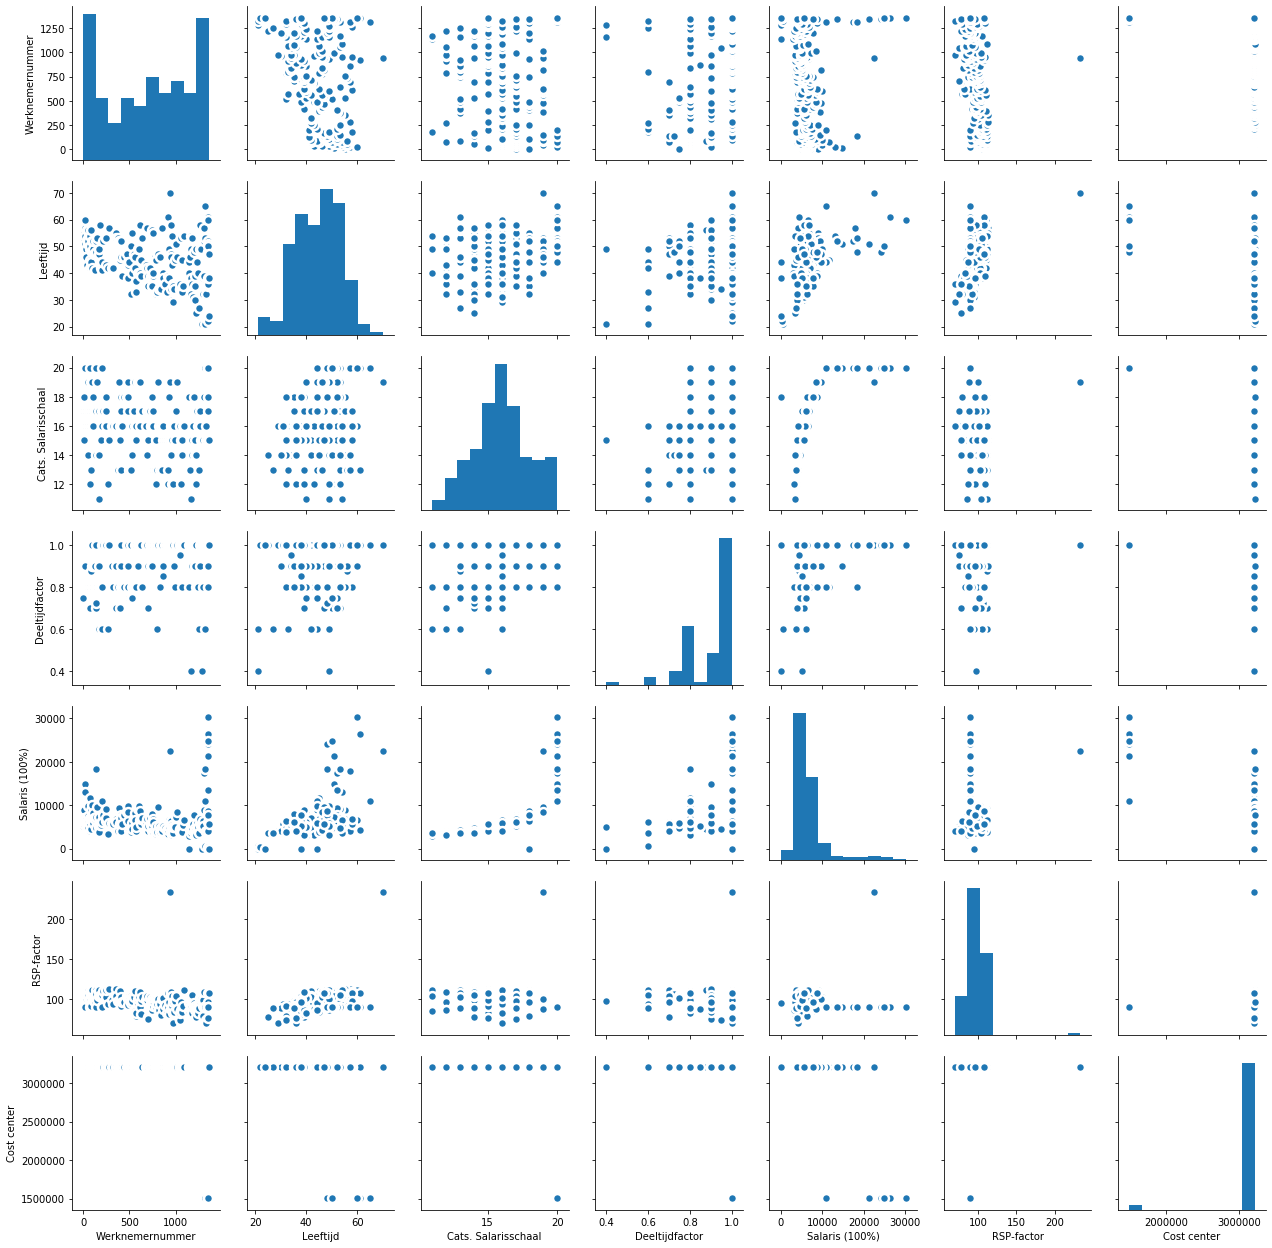

In [37]:
sns.pairplot(HR_Data, plot_kws=dict(s=80, edgecolor="white", linewidth=2.5), kind='scatter')

Werknemernummer niet interessant.\
Leeftijd redelijke verspreiding -> interessant om verder uit te zoeken.\
Salarisschaal categorie, lastig te zeggen want is een getal als index.\
Deeltijdfactor: veel mensen toch richting 100%, logisch ook meesten zijn 1 of 2 dagen vrij als je parttime werkt.\
Salaris: interessante, je ziet weinig uitschieters. Veel mensen verdienen ongeveer gelijk.\
RSP-factor, ook redelijk gelijk.\
Cost center niet interessant, behalve je ziet dat er weinig mensen in costcenter 150.. zitten en veel in 320.. . 150.. is andere company en zit alleen de board in.

### Visualisaties in Python

In [38]:
Geslacht_Distr=np.unique(HR_Data.Geslacht, return_counts=True)

([<matplotlib.patches.Wedge at 0x244541ceac8>,
 [Text(-0.08989314733204933, -1.096320766045567, 'M'),
  Text(0.0898930446870911, 1.0963207744619659, 'V')],
 [Text(-0.04903262581748145, -0.5979931451157637, '47.4%'),
  Text(0.04903256982932241, 0.5979931497065268, '52.6%')])

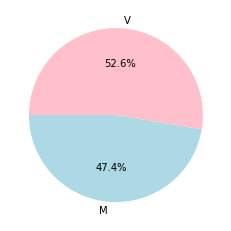

In [39]:
plt.pie(Geslacht_Distr[1], labels=np.unique(Geslacht_Distr[0], return_counts=False), autopct='%1.1f%%', shadow=False, startangle=180, colors =['lightblue', 'pink'])

52.6% van de werknemers is vrouw, 47.4% is man. Er werken dus meer vrouwen dan mannen bij Synthon, maar dit verschil is klein.

Als we gaan kijken naar leeftijden, is het handig om leeftijden in leeftijdsgroepen in te delen.\
Laten we de volgende leeftijdsgroepen maken:\
- 18-29 jaar
- 30-39 jaar
- 40-49 jaar
- 50-59 jaar
- 60-69 jaar
- 70 jaar en ouder

In [40]:
leeftijd_bins = [17, 29, 39, 49, 59, 69, 120]
leeftijdsgroepen_unique = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
HR_Data['Leeftijdsgroep'] = pd.cut(HR_Data.Leeftijd, leeftijd_bins, labels = leeftijdsgroepen_unique,include_lowest = True)

In [41]:
HR_Data[['Leeftijd','Leeftijdsgroep']]

,Leeftijd,Leeftijdsgroep
0,52,50-59
1,55,50-59
2,51,50-59
3,52,50-59
4,49,40-49
...,...,...
187,60,60-69
188,22,18-29
189,47,40-49
190,38,30-39


In [42]:
HR_Data[HR_Data.Afdeling=='Finance & Accounting']

,Datum in dienst,Datum uit dienst,Geslacht,Nationaliteit,Werknemernummer,Geboortedatum,Leeftijd,Arbeidscontract,Cats. Salarisschaal,Deeltijdfactor,Salaris (100%),RSP-factor,Afdeling,Functiefamilie,Functie,Cost center,Hoofdafdeling,Leeftijdsgroep
16,1998-09-01,NaT,M,Nederlandse,56,1963-07-12,56,Onbepaalde duur,14.0,0.8,4768.0,105.35,Finance & Accounting,Officer,Officer-B,3204040,G&A,50-59
79,2011-04-01,NaT,M,Nederlandse,595,1979-08-29,40,Onbepaalde duur,19.0,1.0,9111.0,94.65,Finance & Accounting,Director,Director-A,3204040,G&A,40-49
102,2007-03-21,NaT,V,Nederlandse,779,1973-09-18,46,Onbepaalde duur,13.0,1.0,4119.0,101.60,Finance & Accounting,Officer,Officer-A,3204040,G&A,40-49
126,2015-09-15,NaT,M,Nederlandse,962,1989-09-10,30,Onbepaalde duur,16.0,1.0,5425.0,91.75,Finance & Accounting,Project Leader,Project Leader-B,3204040,G&A,30-39
152,2018-09-01,NaT,M,Nederlandse,1186,1988-12-26,31,Onbepaalde duur,16.0,1.0,5593.0,94.59,Finance & Accounting,Project Leader,Project Leader-B,3204040,G&A,30-39


Hoeveel mensen zitten er in elke leeftijsgroep? En hoeveel mannen en vrouwen?

In [43]:
Aantal_Totaal=[]
Aantal_M=[]
Aantal_V=[]

for i in range(len(leeftijdsgroepen_unique)):
    Aantal_Totaal.append(HR_Data.Leeftijdsgroep[HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i]].count())
    Aantal_M.append(HR_Data.Leeftijdsgroep[(HR_Data.Geslacht=='M') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])].count())
    Aantal_V.append(HR_Data.Leeftijdsgroep[(HR_Data.Geslacht=='V') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])].count())

In [44]:
Leeftijdsgroep_Data=[leeftijdsgroepen_unique,Aantal_Totaal,Aantal_M,Aantal_V]
Leeftijdsgroep_Data

[['18-29', '30-39', '40-49', '50-59', '60-69', '70+'],
 [7, 53, 74, 52, 5, 1],
 [2, 20, 30, 34, 4, 1],
 [5, 33, 44, 18, 1, 0]]

Laten we dit plotten in een barplot.\
Deze plotopzet wordt vaker gebruikt in dit Notebook. Voor efficientie is een definitie geschreven. Ik voeg labels boven de bars toe om meteen de values te kunnen zien. Hier schrijf ik een definitie voor, zo kunnen we deze in toekomstige grafieken in dit Notebook ook gebruiken.\
Grijs is Totaal. Blauw is Man. Roze is Vrouw.


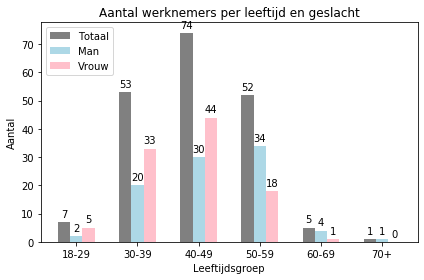

In [45]:
def graph_aantal_lft(Data, graph_title, y_name = 'Aantal', label = 'Getal'):
    labels = Data[0]
    x = np.arange(len(labels))  # label locaties
    width = 0.2
    fig, ax = plt.subplots()
    bar_T = ax.bar(x - width, Data[1], width, label='Totaal',color="grey")
    bar_M = ax.bar(x, Data[2], width, label='Man',color="lightblue")
    bar_V = ax.bar(x + width, Data[3], width, label='Vrouw',color="pink")

    #Legenda, titels
    ax.set_title(graph_title)
    ax.legend(loc = 'upper left')

    ax.set_xlabel('Leeftijdsgroep')
    ax.set_xticklabels(labels) # labels x-as
    ax.set_xticks(x)
    ax.set_ylabel(y_name)

    def autolabel(bars): #integer label definition
        for bar in bars:
            height = bar.get_height()
            ax.annotate('{}'.format(height),
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
            
    if label == 'Getal': #integer label
        autolabel(bar_T)
        autolabel(bar_M)
        autolabel(bar_V)
    elif label == 'Percentage': #percentage label
        difference_perc = []
        for i in range(len(labels)):
            difference_perc.append((Data[2][i])/(Data[3][i]))
            if math.isnan(difference_perc[i]): 
                difference_perc[i]=""
            else: 
                difference_perc[i]='{:.1f}%'.format(100.*difference_perc[i])
        pairs = len(Data[0])
        make_pairs = zip(*[ax.get_children()[:pairs],ax.get_children()[pairs:pairs*2]])
 
        for i,(left, right) in enumerate(make_pairs):
             ax.text(i,max(left.get_bbox().y1,right.get_bbox().y1)+200,difference_perc[i], horizontalalignment ='center') 
        #%-text in het midden van de bars
                   
            
    fig.tight_layout() #zorgt dat het goed past

    plt.show()
    
graph_aantal_lft(Leeftijdsgroep_Data, 'Aantal werknemers per leeftijd en geslacht')

Interessant: Werken tot en met leeftijdsgroep van 40-49 meer vrouwen in verhouding met mannen, maar boven 50 slaat dit significant om.

Laten we eens kijken hoe dit bij de Board zit.

In [46]:
Aantal_Board_Totaal=[]
Aantal_Board_M=[]
Aantal_Board_V=[]

for i in range(len(leeftijdsgroepen_unique)):
    Aantal_Board_Totaal.append(HR_Data.Leeftijdsgroep[(HR_Data.Functie=='Board') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])].count())
    Aantal_Board_M.append(HR_Data.Leeftijdsgroep[(HR_Data.Functie=='Board') & (HR_Data.Geslacht=='M') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])].count())
    Aantal_Board_V.append(HR_Data.Leeftijdsgroep[(HR_Data.Functie=='Board') & (HR_Data.Geslacht=='V') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])].count())

In [47]:
Leeftijdsgroep_Board_Data=[leeftijdsgroepen_unique,Aantal_Board_Totaal,Aantal_Board_M,Aantal_Board_V]
Leeftijdsgroep_Board_Data

[['18-29', '30-39', '40-49', '50-59', '60-69', '70+'],
 [0, 0, 1, 2, 3, 0],
 [0, 0, 1, 2, 3, 0],
 [0, 0, 0, 0, 0, 0]]

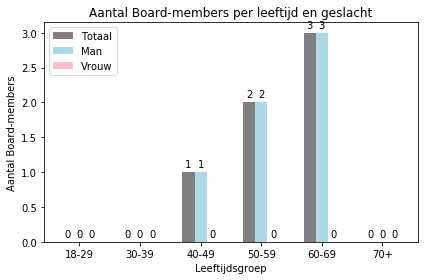

In [48]:
graph_aantal_lft(Leeftijdsgroep_Board_Data, 'Aantal Board-members per leeftijd en geslacht', 'Aantal Board-members')

Board bestaat alleen maar uit mannen, jongste in leeftijdsgroep 40-49 jaar, oudste in leeftijd 60-69 jaar.

In [49]:
HR_Data.Leeftijd[(HR_Data.Functie=='Board')].min()

48

In [50]:
HR_Data.Leeftijd[(HR_Data.Functie=='Board')].max()

65

Leeftijdsrange van de Board is 48-65 jaar.

Laten we nu eens naar het salaris gaan kijken. Hoe is dit verdeeld tussen mannen en vrouwen?

In [51]:
Avg_Salaris_Totaal=[]
Avg_Salaris_M=[]
Avg_Salaris_V=[]

for i in range(len(leeftijdsgroepen_unique)):
    Avg_Salaris_Totaal.append(round(HR_Data[HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i]]['Salaris (100%)'].mean(),0))
    Avg_Salaris_M.append(round(HR_Data[(HR_Data.Geslacht=='M') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])]['Salaris (100%)'].mean(),0))
    Avg_Salaris_V.append(round(HR_Data[(HR_Data.Geslacht=='V') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])]['Salaris (100%)'].mean(),0))

In [52]:
Leeftijdsgroep_Avg_Salaris_Data=[leeftijdsgroepen_unique,Avg_Salaris_Totaal,Avg_Salaris_M,Avg_Salaris_V]
Leeftijdsgroep_Avg_Salaris_Data

[['18-29', '30-39', '40-49', '50-59', '60-69', '70+'],
 [1767.0, 4869.0, 6734.0, 7969.0, 15712.0, 22425.0],
 [3843.0, 5072.0, 7414.0, 9017.0, 18548.0, 22425.0],
 [936.0, 4746.0, 6270.0, 5990.0, 4364.0, nan]]

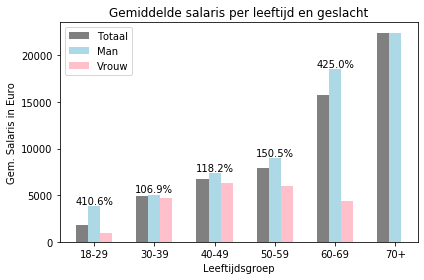

In [53]:
graph_aantal_lft(Leeftijdsgroep_Avg_Salaris_Data, 'Gemiddelde salaris per leeftijd en geslacht', 'Gem. Salaris in Euro','Percentage')

Percentage laat zien hoeveel mannen gemiddeld meer verdienen dan vrouwen in die leeftijdsgroep.\
We hebben al eerder gezien dat er alleen mannen in de Board zitten, hogere functie is logischerwijs hoger salaris. Maar deze Board members zijn 48+ en in andere leeftijdsgroepen verdienen mannen ook meer dan vrouwen.

Bekijken per (hoofd)afdeling

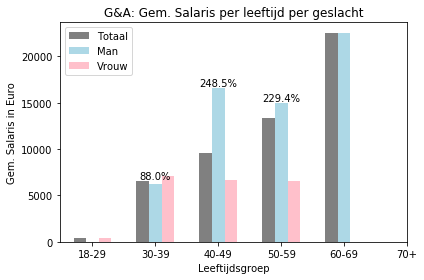

In [54]:
GA_Avg_Salaris_Totaal=[]
GA_Avg_Salaris_M=[]
GA_Avg_Salaris_V=[]

GA_Avg_Salaris_Data=[leeftijdsgroepen_unique,GA_Avg_Salaris_Totaal,GA_Avg_Salaris_M,GA_Avg_Salaris_V]

for i in range(len(leeftijdsgroepen_unique)):
    GA_Avg_Salaris_Totaal.append(round(HR_Data[(HR_Data.Hoofdafdeling=='G&A') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])]['Salaris (100%)'].mean(),0))
    GA_Avg_Salaris_M.append(round(HR_Data[(HR_Data.Hoofdafdeling=='G&A') & (HR_Data.Geslacht=='M') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])]['Salaris (100%)'].mean(),0))
    GA_Avg_Salaris_V.append(round(HR_Data[(HR_Data.Hoofdafdeling=='G&A') & (HR_Data.Geslacht=='V') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])]['Salaris (100%)'].mean(),0))

graph_aantal_lft(GA_Avg_Salaris_Data, 'G&A: Gem. Salaris per leeftijd per geslacht', 'Gem. Salaris in Euro','Percentage')

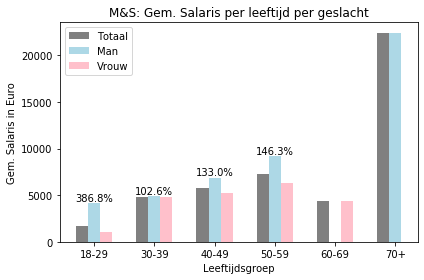

In [55]:
MS_Avg_Salaris_Totaal=[]
MS_Avg_Salaris_M=[]
MS_Avg_Salaris_V=[]

MS_Avg_Salaris_Data=[leeftijdsgroepen_unique,MS_Avg_Salaris_Totaal,MS_Avg_Salaris_M,MS_Avg_Salaris_V]

for i in range(len(leeftijdsgroepen_unique)):
    MS_Avg_Salaris_Totaal.append(round(HR_Data[(HR_Data.Hoofdafdeling=='M&S') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])]['Salaris (100%)'].mean(),0))
    MS_Avg_Salaris_M.append(round(HR_Data[(HR_Data.Hoofdafdeling=='M&S') & (HR_Data.Geslacht=='M') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])]['Salaris (100%)'].mean(),0))
    MS_Avg_Salaris_V.append(round(HR_Data[(HR_Data.Hoofdafdeling=='M&S') & (HR_Data.Geslacht=='V') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])]['Salaris (100%)'].mean(),0))

graph_aantal_lft(MS_Avg_Salaris_Data, 'M&S: Gem. Salaris per leeftijd per geslacht', 'Gem. Salaris in Euro','Percentage')

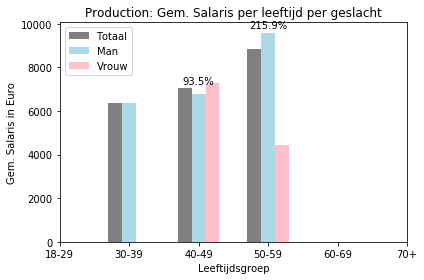

In [56]:
PRD_Avg_Salaris_Totaal=[]
PRD_Avg_Salaris_M=[]
PRD_Avg_Salaris_V=[]

PRD_Avg_Salaris_Data=[leeftijdsgroepen_unique,PRD_Avg_Salaris_Totaal,PRD_Avg_Salaris_M,PRD_Avg_Salaris_V]

for i in range(len(leeftijdsgroepen_unique)):
    PRD_Avg_Salaris_Totaal.append(round(HR_Data[(HR_Data.Hoofdafdeling=='PRD') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])]['Salaris (100%)'].mean(),0))
    PRD_Avg_Salaris_M.append(round(HR_Data[(HR_Data.Hoofdafdeling=='PRD') & (HR_Data.Geslacht=='M') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])]['Salaris (100%)'].mean(),0))
    PRD_Avg_Salaris_V.append(round(HR_Data[(HR_Data.Hoofdafdeling=='PRD') & (HR_Data.Geslacht=='V') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])]['Salaris (100%)'].mean(),0))

graph_aantal_lft(PRD_Avg_Salaris_Data, 'Production: Gem. Salaris per leeftijd per geslacht', 'Gem. Salaris in Euro','Percentage')

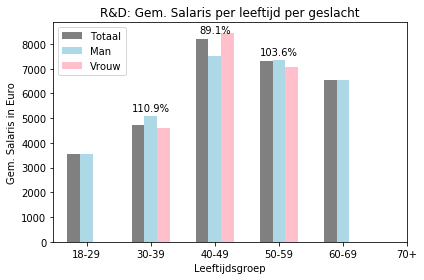

In [57]:
RD_Avg_Salaris_Totaal=[]
RD_Avg_Salaris_M=[]
RD_Avg_Salaris_V=[]

RD_Avg_Salaris_Data=[leeftijdsgroepen_unique,RD_Avg_Salaris_Totaal,RD_Avg_Salaris_M,RD_Avg_Salaris_V]

for i in range(len(leeftijdsgroepen_unique)):
    RD_Avg_Salaris_Totaal.append(round(HR_Data[(HR_Data.Hoofdafdeling=='R&D') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])]['Salaris (100%)'].mean(),0))
    RD_Avg_Salaris_M.append(round(HR_Data[(HR_Data.Hoofdafdeling=='R&D') & (HR_Data.Geslacht=='M') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])]['Salaris (100%)'].mean(),0))
    RD_Avg_Salaris_V.append(round(HR_Data[(HR_Data.Hoofdafdeling=='R&D') & (HR_Data.Geslacht=='V') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])]['Salaris (100%)'].mean(),0))

graph_aantal_lft(RD_Avg_Salaris_Data, 'R&D: Gem. Salaris per leeftijd per geslacht', 'Gem. Salaris in Euro','Percentage')

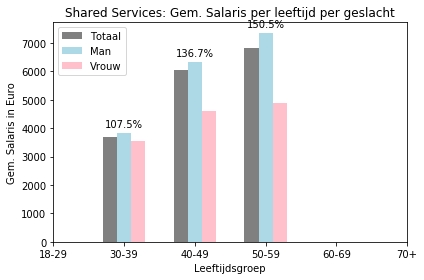

In [58]:
SS_Avg_Salaris_Totaal=[]
SS_Avg_Salaris_M=[]
SS_Avg_Salaris_V=[]

SS_Avg_Salaris_Data=[leeftijdsgroepen_unique,SS_Avg_Salaris_Totaal,SS_Avg_Salaris_M,SS_Avg_Salaris_V]

for i in range(len(leeftijdsgroepen_unique)):
    SS_Avg_Salaris_Totaal.append(round(HR_Data[(HR_Data.Hoofdafdeling=='Shared Services') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])]['Salaris (100%)'].mean(),0))
    SS_Avg_Salaris_M.append(round(HR_Data[(HR_Data.Hoofdafdeling=='Shared Services') & (HR_Data.Geslacht=='M') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])]['Salaris (100%)'].mean(),0))
    SS_Avg_Salaris_V.append(round(HR_Data[(HR_Data.Hoofdafdeling=='Shared Services') & (HR_Data.Geslacht=='V') & (HR_Data.Leeftijdsgroep==leeftijdsgroepen_unique[i])]['Salaris (100%)'].mean(),0))

graph_aantal_lft(SS_Avg_Salaris_Data, 'Shared Services: Gem. Salaris per leeftijd per geslacht', 'Gem. Salaris in Euro','Percentage')

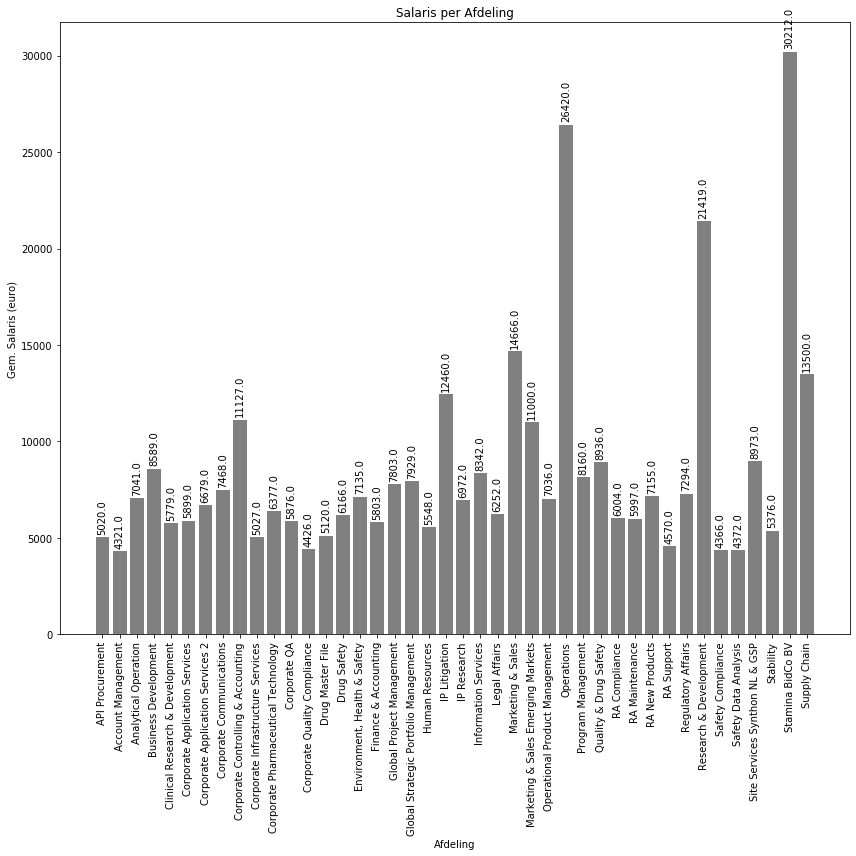

In [59]:
Afdeling = round(HR_Data.groupby(['Afdeling'])['Salaris (100%)'].mean(),0)
labels_Afdeling = Afdeling.index
fig, ax = plt.subplots(figsize=(12,12))
bar=ax.bar(labels_Afdeling,Afdeling,color="grey")

#Legenda, titels
ax.set_title('Salaris per Afdeling')
ax.set_xlabel('Afdeling')
plt.xticks(rotation=90)
ax.set_ylabel('Gem. Salaris (euro)')

def autolabel(bars):
#doel: value_label boven elke bar
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',rotation=90)


autolabel(bar)

fig.tight_layout() #zorgt dat het goed past

plt.show()


We krijgen al steeds meer inzichten, maar om verder te kunnen drillen kunnen we beter een interactief dashboard bouwen. Het is tijd voor de volgende stap: IBM Cognos Analytics

### Export Data

Exporteer opgeschoonde HR_Data naar CSV zodat ik deze data kan gebruiken om een dashboard te bouwen in IBM Cognos Analytics.

In [60]:
HR_Data.to_csv('HR_Data_DashboardReady.csv')

### Dashboard

In IBM Cognos Analytics heb ik twee dashboard gemaakt. Een om de man/vrouw verhoudingen in verschillende opzichten te vergelijken en een om te kijken hoe salarissen verdeeld zijn.

Tijdens het bouwen van het dashboard blijkt het een goede toevoeging te zijn om een kolom toe te voegen die het parttime/fulltime werken weergeeft. Deze voeg ik nog toe.

In [61]:
HR_Data['Fulltime'] = np.where(HR_Data['Deeltijdfactor']==1, 'Fulltime', 'Parttime')
HR_Data

,Datum in dienst,Datum uit dienst,Geslacht,Nationaliteit,Werknemernummer,Geboortedatum,Leeftijd,Arbeidscontract,Cats. Salarisschaal,Deeltijdfactor,Salaris (100%),RSP-factor,Afdeling,Functiefamilie,Functie,Cost center,Hoofdafdeling,Leeftijdsgroep,Fulltime
0,1994-06-01,NaT,V,Nederlandse,3,1967-08-05,52,Onbepaalde duur,15.0,0.75,5164.0,99.77,Corporate Quality Compliance,Officer,Officer-C,3203020,M&S,50-59,Parttime
1,1994-11-01,NaT,M,Nederlandse,6,1964-05-07,55,Onbepaalde duur,18.0,1.00,8973.0,111.16,Site Services Synthon NL & GSP,Project Leader,Project Leader-D,3204060,G&A,50-59,Fulltime
2,1995-01-01,NaT,V,Nederlandse,7,1968-05-24,51,Onbepaalde duur,17.0,1.00,7048.0,101.94,API Procurement,Project Leader,Project Leader-C,3201050,Shared Services,50-59,Fulltime
3,1995-02-01,NaT,M,Nederlandse,10,1968-03-10,52,Onbepaalde duur,15.0,1.00,5745.0,110.99,Corporate Application Services,Officer,Officer-C,3205010,Shared Services,50-59,Fulltime
4,1995-09-01,NaT,M,Nederlandse,16,1971-04-06,49,Onbepaalde duur,16.0,1.00,6579.0,111.26,Corporate Application Services,Project Leader,Project Leader-B,3205010,Shared Services,40-49,Fulltime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2019-11-01,NaT,M,Nederlandse,1350,1959-08-14,60,Onbepaalde duur,20.0,1.00,30212.0,90.00,Stamina BidCo BV,Chief x Officer,Board,1504050,G&A,60-69,Fulltime
188,2020-02-10,2020-06-28,V,Nederlandse,1351,1997-06-02,22,Stagiair(e),NaN,1.00,400.0,NaN,Human Resources,Intern,Intern,3204030,G&A,18-29,Fulltime
189,2020-03-01,2021-02-28,M,Nederlandse,1352,1973-02-01,47,Tijdelijk contract,15.0,1.00,5598.0,108.15,Drug Master File,Project Leader,Project Leader-A,3203011,M&S,40-49,Fulltime
190,2019-11-25,2020-11-25,V,Nederlandse,1353,1982-03-26,38,Uitzendcontract,NaN,1.00,0.0,NaN,API Procurement,Assistant,Assistant-B,3201050,Shared Services,30-39,Fulltime


In [62]:
HR_Data.to_csv('HR_Data_DashboardReady.csv')

Ik heb interactieve en dynamische dashboards gebouwd. Klik je ergens op dan updaten de cijfers en maak je een selectie. Voor de hardcopy dashboards, zie bijlage in de mail.

Als je de rapportage opent, is het eerste dashboard het zogenoemde 'FTE Dashboard'. Op dit moment zijn er 192 mensen werkzaam binnen Synthon met een gemiddelde leeftijd van 45 jaar. Van de werknemers is 47.4% man en 52.6% vrouw. Hou je je muis boven het paarse veld in de pie chart dan zie je dat er 91 mannen zijn. Hou je je muis boven het groenblauwe vlak dan zie je dat Synthon 101 vrouwelijke werknemers heeft. Kortom, de verdeling is bijna gelijk.

In dit dashboard vind je drie staafdiagrammen:
1. Rechtsboven vind je het aantal werknemers per leeftijdsgroep. Je kunt hier direct uit opmaken dat de meeste mensen tussen de 30 en 59 jaar zijn. De grootste groep is 40-49 jaar, deze groep vertegenwoordigt meer dan een derde van de werknemers.
2. Linksonder staat de staafdiagram 'Aantal werknemers per hoofdafdeling'. Je ziet direct dat bijna 50% van de werknemers in M&S (Marketing & Sales) department werkzaam is.
3. Rechtsonder kan je overzicht krijgen in het aantal werknemers dat fulltime of parttime werkt. Je kan dit per leeftijdsgroep zien. Zo zie je dat werknemers in alle leeftijdsgroepen gemiddeld gezien meer fulltime werken dan parttime, behalve in de leeftijdsgroep 40-49 jaar. Dan zie je een omslag: meer werknemers in de leeftijdsgroep van 40-49 jaar werken  parttime dan fulltime

Stel we willen weten waaruit de parttime werkers in de leeftijdsgroep 40-49 jaar bestaan. Wat verwachten we? Over het algemeen werken vrouwen (met kinderen) vaker parttime dan mannen. De leeftijdgroep 40-49 jaar is wel de doelgroep voor het hebben van opgroeiende kinderen. KLopt dit? We klikken op de desbetreffende staaf van 60%. De cijfers en grafieken updaten onmiddelijk. Deze groep bestaat uit 42 mensen. De pie chart laat onmiddelijk zien dat 81% van deze selectie vrouw is. Onze vermoedens waren dus juist. We zien ook dat 50% van deze mensen werkzaam is op M&S. Eerder zagen we ook dat dit de grootste afdeling is en dat bijna 50% van de werknemers in deze afdeling werkt. Dit is dus wel in lijn met elkaar.

Een interessante ontdekking is de verdeling in de hoofdafdeling PRD (Production). Als we op de staaf klikken in het staafdiagram linksonder, updaten de cijfers en grafieken weer gegeven deze selectie. We zien dat 70% van de werknemers op de productie afdeling een leeftijd heeft tussen 50 en 59 jaar. Dit is een groot verschil met het gemiddelde van het hele bedrijf. Bovendien zie je dat 80% van de werknemers bij productie man is. Zou dit dan ook betekenen dat meer mensen fulltime werken? Jazeker. Kijken we naar de grafiek rechtsonder. Dan zien we dat in de leeftijdsgroep 30-39 jaar 100% fulltime werkt, in 40-49 jaar 50% en in de leeftijdsgroep 50-59 jaar 71.4%. Dit is een groot verschil met andere afdelingen. Hoe kan dit? 1 van de punten waar het aan zou kunnen liggen, is de grootte van de data. Er zijn maar 10 werknemers werkzaam op de afdeling productie. Bovendien kunnen er op deze afdeling functies worden uitgeoefend die minder geliefd zijn bij vrouwen.

In het tweede dashboard kunnen we dieper kijken op functies van werknemers en de corresponderende salarissen. In 'Salaris Dashboard' zie je dat het gemiddelde fulltime maandsalaris 6688 euro. Stel we filteren op geslacht, dan zien we dat dit stijgt voor mannen naar 8074 euro en daalt voor vrouwen naar 5439 euro. Kan je dan meteen zeggen dat vrouwen onderbetaald worden? Nee, naar mijn verwachting is dit mede afhankelijk van de functie van een werknemer.\
In de staafdiagram linksboven zien we dat mannen in elke leeftijdscategorie meer verdienen dan vrouwen. Dit is natuurlijk wel opmerkelijk. In het begin van je carriere staat iedereen met dezelfde opleiding immers gelijk qua kennis.\
Note: er zijn vrouwelijke stagaires. Dit zorgt ervoor dat vrouwen tussen de 18-29 jaar een zeer laag gemiddeld salaris hebben.\
We kunnen ook meteen zien in de grafiek rechtsboven dat de hofodafdeling G&A (General & Administrative) het hoogste gemiddelde salaris heeft. Laten we hier eens op filteren. Ik klik op de staafdiagram van G&A. Wat valt op?:
- Deze groep bestaat uit 22 werknemers met een gemiddelde leeftijd van 45 jaar. Hiervan is 13 man en 9 vrouw.
- Het gemiddelde fulltime maandsalaris is 10931 euro. Het hoogste gemiddelde salaris wordt verdiend in de leeftijdsgroep 40-49 jaar voor geslacht man.
- Vrouwen tussen de 30 jaar en 59 jaar veranderen weinig in gemiddeld salaris.
- Stel we filteren verder op man 40-49 jaar. Dan houden we twee werknemers over, die allebei Chief x Officer zijn. Dit is een leidinggevende functie.
Van 'FTE Dashboard' weten we nog dat de grootste groep werkzaam was op de hoofdafdeling M&S. Laten we daarop filteren en stel we filteren verder op de afdeling Business Development. Dan zie je dat hier 3 mensen werkzaam zijn. Een vrouw van 30-39, een vrouw van 40-49 jaar en een man van 40-49 jaar. De man van 40-49 jaar heeft een hoger salaris dan de vrouw van 40-49 jaar. Laten we eens kijken of zij dezelfde functie hebben. Voor deze drie mensen zijn er twee functies over in de grafiek linksonder: Director en Project Leader. Als we filteren op Director, houden we inderdaad de man en vrouw over in leeftijdsgroep 40-49 jaar. Dus deze twee mensen hebben allebei dezelfde functie maar de vrouw verdient minder dan de man.

### Conclusie

Het doel van dit project was om meer inzicht te krijgen in de HR-data. Met behulp van het prepareren, analyseren en bouwen van de dashboards heeft Synthon meer inzichten gekregen. Uit de dashboards kunnen meerdere conclusies getrokken worden, bijv. mannen verdienen gemiddeld gezien meer dan vrouwen maar vertegenwoordigen over het algemeen hogere functies. Er zijn functies waarbij vrouwen en mannen hetzelfde beroep uitoefenen, maar de vrouw minder verdient dan de man. 77% van de vrouwen werkt parttime en dit percentage is het hoogst in de leeftijdsgroep 40-49 jaar.\
Er kunnen nog veel meer conclusies getrokken worden uit de beschikbare data. Echter is het hoofddoel gelukt: meer inzicht krijgen in HR-data.

Voor de optimale look en feeling demonstreer ik de dashboard graag tijdens een meeting

### Aanbevelingen

Met de huidige HR dataset is Web Scraping geen toegevoegde waarde. Synthon heeft geen data online staan en externe databronnen geven hierop geen toegevoegde informatie. Het hoofddoel van dit onderzoek is om meer inzicht in HR data te creeren voor Synthon binnen Nederland. Dit is zeker gelukt. De man/vrouw verhoudingen op afdelingen zijn in kaart gebracht, de fulltime/parttime ratio's per afdeling en de salarissen binnen afdelingen en functies. \
In de toekomst willen wij binnen Synthon deze data in eerste instantie uitbreiden met data van de andere sites en later met verzuimdata van zowel Nederland als de sites in de andere landen. Dit betekent zowel ziekte- als zwangerschapsverzuim. Voor het ziekteverzuim zou het waardevol kunnen zijn om de datum naast de datum van bijvoorbeeld een griepgolf in het desbetreffende land te kunnen leggen. Hiervoor zou webscraping ideaal zijn. In Nederland zou hiervoor de data van Centraal Bureau voor de Statistiek (CBS) gebruikt kunnen worden. Naar verwachting zijn zulke databronnen ook beschikbaar in andere landen.\
Dit ziekteverzuim zal ingelezen worden in IBM Planning & Analytics waarin de data wordt opgeslagen in kubussen. Met een directe connectie kunnen er zo visualisaties gemaakt worden in IBM Cognos Analytics en zo de inferentie met historische en huidige data in kaart te brengen. Met Machine Learning kunnen we historische data gebruiken voor het voorspellen van bijvoorbeeld een toekomstige griepgolf. Zo kan Synthon de FTE-capaciteit accurater inschatten. Met als gevolg dat afdelingen niet onder bezet raken en overwerk minimaal is om zo burnout klachten te kunnen beperken. Voor het C-level management kunnen deze inzichten gebruikt worden in het bepalen van het projectportfolio en voor het aansturen op capaciteitsaanpassingen indien dit nodig wordt geacht.